In [649]:
#%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#파일 저장
import os

In [665]:
#csv데이터 불러와 초기화
df = pd.read_csv('merged_data/result_total.csv',  header=1, encoding='euc-kr' )

#전체 표에서 년도, 자치구, 사람수, 유기견수만 추출
df = df.iloc[:, [0,1,2,5]]

#추출된 데이터프레임에서 합계 행(서울시 전체 값) 제거
df = df[df['자치구']!='합계']
df

,년도,자치구,사람 수,유기견수
1,2005,종로구,169315,258
2,2005,중구,130027,264
3,2005,용산구,230260,383
4,2005,성동구,337744,431
5,2005,광진구,375613,788
...,...,...,...,...
359,2018,관악구,501957,493
360,2018,서초구,433951,124
361,2018,강남구,542364,158
362,2018,송파구,666635,211


## 2016년도 최소, 최대 구 추출 및 평균 유기견 수 

In [661]:
#가장 낮은 유기견 수를 가진 구 추출 : 중구
df = df[df['년도'] == 2016]
df[df['유기견수'] == min(df['유기견수'])]

,년도,자치구,사람 수,유기견수
288,2016,중구,125249,85


In [662]:
#가장 높은 유기견 수를 가진 구 추출 : 관악구
df = df[df['년도'] == 2016]
df[df['유기견수'] == max(df['유기견수'])]

,년도,자치구,사람 수,유기견수
307,2016,관악구,506851,550


In [663]:
#유기견 수의 평균
df = df[df['년도'] == 2016]

avg = df['유기견수'].mean()
avg

234.88

### 2016년도 
min : 중구 / 85 마리 <br>
max : 관악구  /  550 마리 <br>
구 평균 유기견 수 : 234.88 마리

## 2017년도 최소, 최대 구 추출 및 평균 유기견 수

In [666]:
df = df[df['년도'] == 2017]
df[df['유기견수'] == min(df['유기견수'])]

,년도,자치구,사람 수,유기견수
314,2017,중구,125709,99


In [667]:
df = df[df['년도'] == 2017]
df[df['유기견수'] == max(df['유기견수'])]

,년도,자치구,사람 수,유기견수
333,2017,관악구,503297,450


In [668]:
#유기견 수의 평균
df = df[df['년도'] == 2017]

avg = df['유기견수'].mean()
avg

223.36

### 2017년도 
min : 중구 / 99 마리 <br>
max : 관악구  /  450 마리 <br>
구 평균 유기견 수 : 223.36 마리

## 2016년도 중구 vs 관악구를 조사한다

In [672]:
#중구
#csv데이터 불러와 초기화
df = pd.read_csv('merged_data/result_total.csv',  header=1, encoding='euc-kr' )
df1 = df[df['년도']== 2016]
df1 = df1[df1['자치구']=='중구']

df1

,년도,자치구,사람 수,남자수,여자수,유기견수,복귀,입양분양,폐사안락사,계류기증,...,비거주용 건물내 주택_여,주택이외의 거처_남,주택이외의 거처_여,20세미만,20대,30대,40대,50대,60대,70대이상
288,2016,중구,125249,62204,63045,85,27,21,37,-,...,339.0,2109.0,1529.0,567.0,4582.0,3735.0,3036.0,2873.0,2348.0,2530.0


In [673]:
#관악구
#csv데이터 불러와 초기화
df = pd.read_csv('merged_data/result_total.csv',  header=1, encoding='euc-kr' )
df2 = df[df['년도']== 2016]
df2 = df2[df2['자치구']=='관악구']

df2

,년도,자치구,사람 수,남자수,여자수,유기견수,복귀,입양분양,폐사안락사,계류기증,...,비거주용 건물내 주택_여,주택이외의 거처_남,주택이외의 거처_여,20세미만,20대,30대,40대,50대,60대,70대이상
307,2016,관악구,506851,256143,250708,550,205,318,27,-,...,3745.0,8542.0,7459.0,1053.0,38095.0,28451.0,12792.0,9262.0,7280.0,7039.0


In [674]:
#평균
#csv데이터 불러와 초기화
df = pd.read_csv('merged_data/result_total_t.csv',  header=1, encoding='euc-kr' )
df3 = df[df['년도']== 2016]
df3 = df3[df3['자치구']=='합계']

#년도, 자치구 또다른 데이터 프레임으로 임시저장
df_temp = df3.iloc[:,0:2]

#년도, 자치구를 제외한 데이터프레임 추출
df3 = df3.iloc[:,2:77].replace('-',0)
df3 = round(df3.astype(float) /26 ,1)


In [675]:
# df_temp + df3 하여 전체구평균 데이터프레임 추출
df3 = pd.concat([df_temp,df3], axis=1)
df3

,년도,자치구,사람 수,남자수,여자수,유기견수,복귀,입양분양,폐사안락사,계류기증,...,비거주용 건물내 주택_여,주택이외의 거처_남,주택이외의 거처_여,20세미만,20대,30대,40대,50대,60대,70대이상
286,2016.0,합계,381946.8,187568.8,194378.0,225.8,84.7,61.2,78.8,1.2,...,727.7,3089.8,2656.3,574.5,10407.8,9980.0,6643.8,5944.7,4943.6,5308.0


In [676]:
#2016년도 중구, 관악구, 평균 데이터프레임 병합
df2016 = pd.concat([df1,df2,df3], ignore_index = False)
df2016

,년도,자치구,사람 수,남자수,여자수,유기견수,복귀,입양분양,폐사안락사,계류기증,...,비거주용 건물내 주택_여,주택이외의 거처_남,주택이외의 거처_여,20세미만,20대,30대,40대,50대,60대,70대이상
288,2016.0,중구,125249.0,62204.0,63045.0,85.0,27.0,21.0,37.0,-,...,339.0,2109.0,1529.0,567.0,4582.0,3735.0,3036.0,2873.0,2348.0,2530.0
307,2016.0,관악구,506851.0,256143.0,250708.0,550.0,205.0,318.0,27.0,-,...,3745.0,8542.0,7459.0,1053.0,38095.0,28451.0,12792.0,9262.0,7280.0,7039.0
286,2016.0,합계,381946.8,187568.8,194378.0,225.8,84.7,61.2,78.8,1.2,...,727.7,3089.8,2656.3,574.5,10407.8,9980.0,6643.8,5944.7,4943.6,5308.0


In [677]:
#2016년도 df의 '합계'로우의 이름 변경
temp_sum = df2016.iloc[2,1] 
temp_sum = '전체 구 평균'
df2016.iloc[2,1]  = temp_sum

In [678]:
#인덱스 정렬
df2016 = df2016.set_index('자치구')
df2016

,년도,사람 수,남자수,여자수,유기견수,복귀,입양분양,폐사안락사,계류기증,있다,...,비거주용 건물내 주택_여,주택이외의 거처_남,주택이외의 거처_여,20세미만,20대,30대,40대,50대,60대,70대이상
자치구,,,,,,,,,,,,,,,,,,,,,
중구,2016.0,125249.0,62204.0,63045.0,85.0,27.0,21.0,37.0,-,23.9,...,339.0,2109.0,1529.0,567.0,4582.0,3735.0,3036.0,2873.0,2348.0,2530.0
관악구,2016.0,506851.0,256143.0,250708.0,550.0,205.0,318.0,27.0,-,21.1,...,3745.0,8542.0,7459.0,1053.0,38095.0,28451.0,12792.0,9262.0,7280.0,7039.0
전체 구 평균,2016.0,381946.8,187568.8,194378.0,225.8,84.7,61.2,78.8,1.2,0.7,...,727.7,3089.8,2656.3,574.5,10407.8,9980.0,6643.8,5944.7,4943.6,5308.0


In [679]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgunsl.ttf').get_name()
mpl.rc('font', family=font_name)

In [680]:
#사람수 비교
df_a = df2016.iloc[:,1:2]
df_a

,사람 수
자치구,
중구,125249.0
관악구,506851.0
전체 구 평균,381946.8


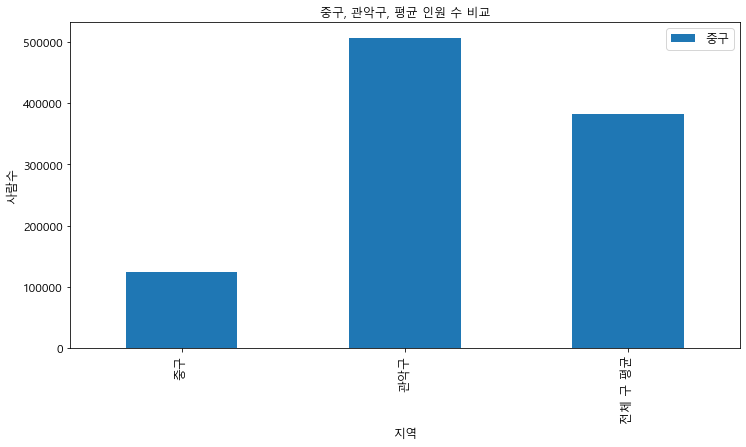

In [681]:
#2016년 중구, 관악구, 평균 인원 수 비교 / legend 이슈
ax = df_a.plot(kind="bar", title="중구, 관악구, 평균 인원 수 비교", figsize=(12,6), legend=True, fontsize=12)
ax.set_xlabel("지역", fontsize=12)
ax.set_ylabel("사람수", fontsize=12)
ax.legend(['중구','관악구','전체 구 평균'], fontsize=12)

In [682]:
#사람수 비교
df_a = df2016.iloc[:,5:9]
df_a

,복귀,입양분양,폐사안락사,계류기증
자치구,,,,
중구,27.0,21.0,37.0,-
관악구,205.0,318.0,27.0,-
전체 구 평균,84.7,61.2,78.8,1.2


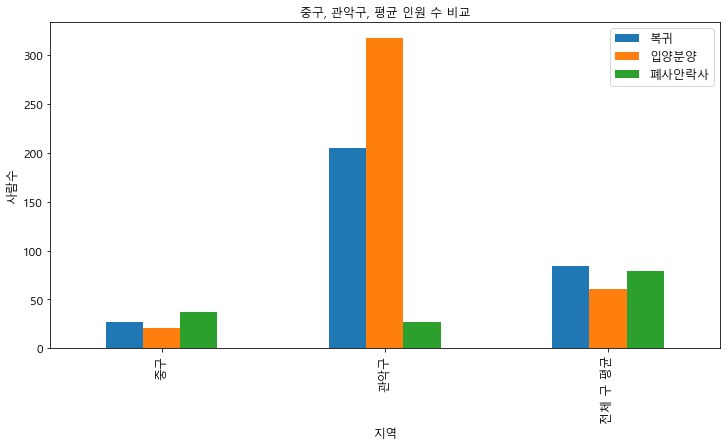

In [683]:
#2016년 중구, 관악구, 평균 인원 수 비교 / legend 이슈
ax = df_a.plot(kind="bar", title="중구, 관악구, 평균 인원 수 비교", figsize=(12,6), legend=True, fontsize=12)
ax.set_xlabel("지역", fontsize=12)
ax.set_ylabel("사람수", fontsize=12)
ax.legend(['복귀','입양분양','폐사안락사','계류기증'], fontsize=12)

In [684]:
#강아지 보유수
df_b = df2016.iloc[:,9:10].astype(float)
df_b

,있다
자치구,
중구,23.9
관악구,21.1
전체 구 평균,0.7


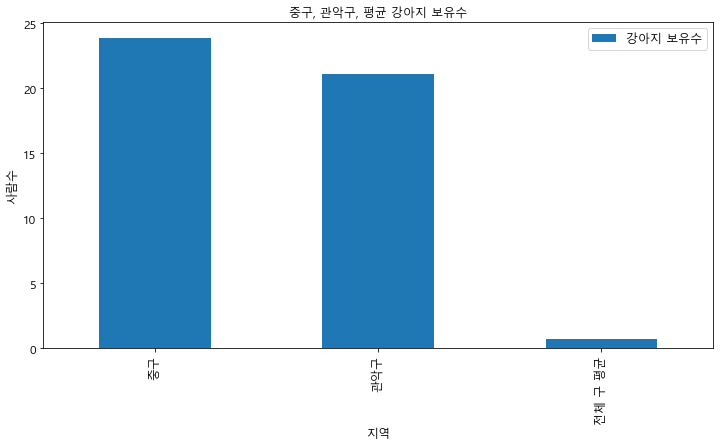

In [685]:
#2016년 중구, 관악구, 평균 강아지 보유수 / legend 이슈
ax = df_b.plot(kind="bar", title="중구, 관악구, 평균 강아지 보유수", figsize=(12,6), legend=True, fontsize=12)
ax.set_xlabel("지역", fontsize=12)
ax.set_ylabel("사람수", fontsize=12)
ax.legend(['강아지 보유수'], fontsize=12)

In [686]:
#강아지 가구수
df_c = df2016.iloc[:,19:26].astype(float)
df_c

,1인가구,2인가구,3인가구,4인가구,5인 가구,6인가구,7인이상 가구
자치구,,,,,,,
중구,19671.0,13086.0,9453.0,6844.0,1836.0,480.0,133.0
관악구,103972.0,51679.0,37389.0,28357.0,6997.0,1692.0,484.0
전체 구 평균,43802.3,35817.8,31421.0,26402.7,6290.6,1429.0,402.3


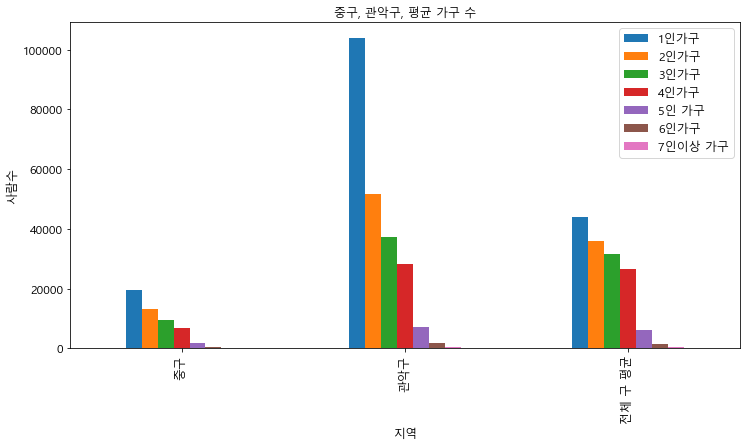

In [687]:
#2016년 중구, 관악구, 평균 가구수 / legend 이슈
ax = df_c.plot(kind="bar", title="중구, 관악구, 평균 가구 수", figsize=(12,6), legend=True, fontsize=12)
ax.set_xlabel("지역", fontsize=12)
ax.set_ylabel("사람수", fontsize=12)
ax.legend(['1인가구','2인가구','3인가구','4인가구','5인 가구','6인가구','7인이상 가구'], fontsize=12)

In [688]:
#세대 수
df_d = df2016.iloc[:,28:38].astype(float)
df_d

,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대,10인세대 이상
자치구,,,,,,,,,,
중구,28368.0,11780.0,9138.0,7615.0,2039.0,508.0,137.0,40.0,12.0,14.0
관악구,128682.0,46565.0,35590.0,30917.0,7735.0,1827.0,459.0,108.0,36.0,36.0
전체 구 평균,60059.0,32580.8,29961.4,29285.2,7077.7,1613.7,398.1,110.9,35.7,25.2


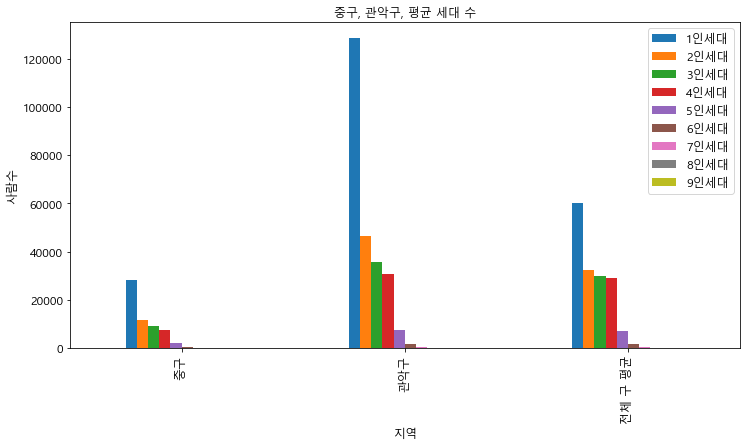

In [689]:
#2016년 중구, 관악구, 평균 가구수 / legend 이슈
ax = df_d.plot(kind="bar", title="중구, 관악구, 평균 세대 수", figsize=(12,6), legend=True, fontsize=12)
ax.set_xlabel("지역", fontsize=12)
ax.set_ylabel("사람수", fontsize=12)
ax.legend(['1인세대','2인세대','3인세대','4인세대','5인세대','6인세대','7인세대','8인세대','9인세대'], fontsize=12)

In [690]:
#주거형태
df_e = df2016.iloc[:,39:43].astype(float)
df_e

,단독주택,아파트,연립주택,다세대주택
자치구,,,,
중구,6364.0,22923.0,1955.0,6333.0
관악구,22636.0,54551.0,6479.0,38369.0
전체 구 평균,13279.6,63130.1,4465.6,26901.8


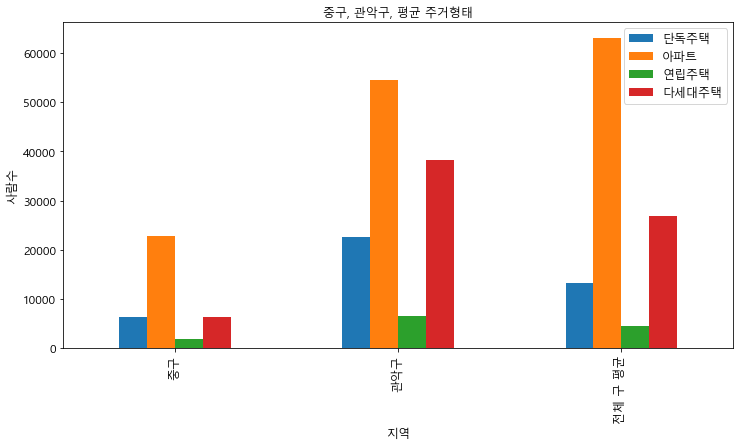

In [691]:
#2016년 중구, 관악구, 평균 주거형태/ legend 이슈
ax = df_e.plot(kind="bar", title="중구, 관악구, 평균 주거형태", figsize=(12,6), legend=True, fontsize=12)
ax.set_xlabel("지역", fontsize=12)
ax.set_ylabel("사람수", fontsize=12)
ax.legend(['단독주택','아파트','연립주택','다세대주택'], fontsize=12)

In [692]:
#공원 비율 및 계
df_f = df2016.iloc[:,46:48].astype(float)
df_f

,공원율(%),공원 계
자치구,,
중구,31.44,70.0
관악구,37.12,110.0
전체 구 평균,1.10,109.0


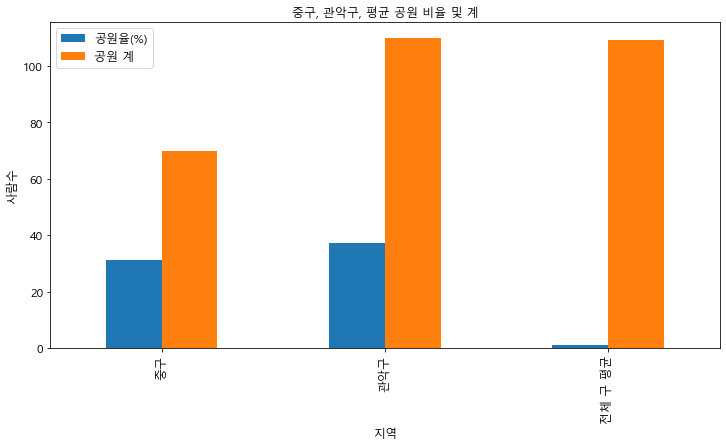

In [693]:
#2016년 중구, 관악구, 평균 공원 비율 및 계 / legend 이슈
ax = df_f.plot(kind="bar", title="중구, 관악구, 평균 공원 비율 및 계", figsize=(12,6), legend=True, fontsize=12)
ax.set_xlabel("지역", fontsize=12)
ax.set_ylabel("사람수", fontsize=12)
ax.legend(['공원율(%)','공원 계'], fontsize=12)

In [694]:
# 연령대
df_g = df2016.iloc[:,69:78].astype(float)
df_g

,20세미만,20대,30대,40대,50대,60대,70대이상
자치구,,,,,,,
중구,567.0,4582.0,3735.0,3036.0,2873.0,2348.0,2530.0
관악구,1053.0,38095.0,28451.0,12792.0,9262.0,7280.0,7039.0
전체 구 평균,574.5,10407.8,9980.0,6643.8,5944.7,4943.6,5308.0


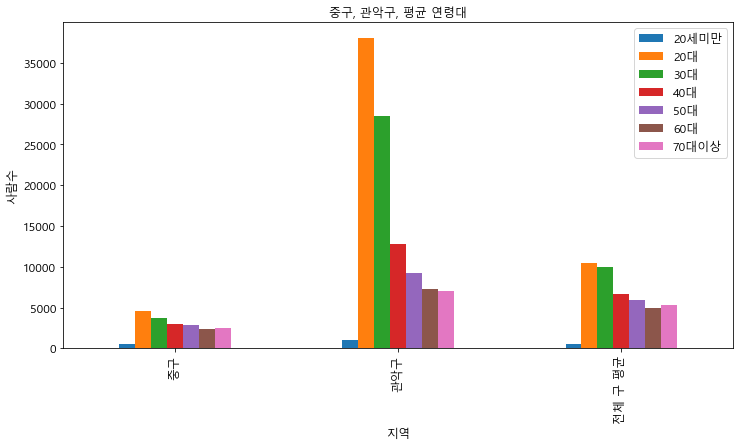

In [695]:
#2016년 중구, 관악구, 평균 연령대 / legend 이슈
ax = df_g.plot(kind="bar", title="중구, 관악구, 평균 연령대", figsize=(12,6), legend=True, fontsize=12)
ax.set_xlabel("지역", fontsize=12)
ax.set_ylabel("사람수", fontsize=12)
ax.legend(['20세미만','20대','30대','40대','50대','60대','70대이상'], fontsize=12)

In [696]:
#사람수 비교
df_a = df2016.iloc[:,1:2]
df_a

,사람 수
자치구,
중구,125249.0
관악구,506851.0
전체 구 평균,381946.8


In [697]:
df_e

,단독주택,아파트,연립주택,다세대주택
자치구,,,,
중구,6364.0,22923.0,1955.0,6333.0
관악구,22636.0,54551.0,6479.0,38369.0
전체 구 평균,13279.6,63130.1,4465.6,26901.8


In [698]:
# 최소117 최대1830
df_e_Tt = round(df_e/df_a.values*10000)
df_e_Tt


,단독주택,아파트,연립주택,다세대주택
자치구,,,,
중구,508.0,1830.0,156.0,506.0
관악구,447.0,1076.0,128.0,757.0
전체 구 평균,348.0,1653.0,117.0,704.0


In [699]:
df_e_T = df_e_Tt.T
df_e_T

자치구,중구,관악구,전체 구 평균
단독주택,508.0,447.0,348.0
아파트,1830.0,1076.0,1653.0
연립주택,156.0,128.0,117.0
다세대주택,506.0,757.0,704.0


In [700]:
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 

In [701]:
group = df_e_T.columns.tolist()
group

['중구', '관악구', '전체 구 평균']

In [702]:
dataT = df_e_T.values.tolist()
dataT

[[508.0, 447.0, 348.0],
 [1830.0, 1076.0, 1653.0],
 [156.0, 128.0, 117.0],
 [506.0, 757.0, 704.0]]

In [703]:
var = []
for i in range(len(dataT)):
    var.append(dataT[i])
    print(var[i])

[508.0, 447.0, 348.0]
[1830.0, 1076.0, 1653.0]
[156.0, 128.0, 117.0]
[506.0, 757.0, 704.0]


In [704]:
# df_e_graph = pd.DataFrame({
#     'group': group,
#     var = []
#     for i in range(len(dataT)):
#         var.append(dataT[i])
#         print(var[i])
# })

In [705]:
# dataT = []
# #dataT = list(df_e.T)


# for i in range(len(df_e_T)):
#     print(i)
#     dataT.append(list(df_e.T.loc[i]))

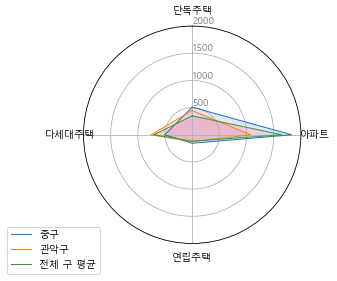

In [706]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data

df_e_graph = pd.DataFrame({
    'group': group,
    '단독주택': var[0],
    '아파트': var[1],
    '연립주택': var[2],
    '다세대주택': var[3]
    
})

# ------- PART 1: Create background
 
# number of variable
categories=list(df_e_graph)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
# 최소117 최대1830
ax.set_rlabel_position(0)
plt.yticks([500,1000,1500,2000], ['500','1000','1500','2000'], color="grey", size=10)
plt.ylim(0,2000)
 
 
# ------- PART 2: Add plots
 
# # Plot each individual = each line of the data
# # I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df_e_graph.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="중구")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df_e_graph.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="관악구")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=df_e_graph.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="전체 구 평균")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


In [707]:
df_e_graph

,group,단독주택,아파트,연립주택,다세대주택
0,중구,508.0,1830.0,156.0,506.0
1,관악구,447.0,1076.0,128.0,757.0
2,전체 구 평균,348.0,1653.0,117.0,704.0


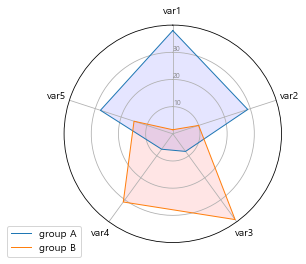

In [708]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


In [709]:
df

,group,var1,var2,var3,var4,var5
0,A,38.0,29,8,7,28
1,B,1.5,10,39,31,15
2,C,30.0,9,23,33,32
3,D,4.0,34,24,14,14


In [710]:
df_e_graph

,group,단독주택,아파트,연립주택,다세대주택
0,중구,508.0,1830.0,156.0,506.0
1,관악구,447.0,1076.0,128.0,757.0
2,전체 구 평균,348.0,1653.0,117.0,704.0
